In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load the dataset from CSV file
csv_path = '/content/code_switching_code_mixing_dataset_100k.csv'
df = pd.read_csv(csv_path)

In [ ]:
# Check the first few rows of the dataset
print(df.head())


                                               text          label
0                          I need to buy some leche  code-switched
1                            The party was very fun    monolingual
2                We will have a fiesta this weekend  code-switched
3                 We will have a party this weekend    monolingual
4  C’est la vie, I guessNous devons finir ce projet     code-mixed


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

In [ ]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=500)  # Unigrams and Bigrams

In [ ]:
# Fit the vectorizer on the training data and transform both train and test data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000, multi_class='ovr')  # Use One-vs-Rest for multi-class
log_reg.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr')

In [ ]:
# Predict the labels for the test set
y_pred = log_reg.predict(X_test_tfidf)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

   code-mixed       1.00      1.00      1.00      6596
code-switched       1.00      1.00      1.00      6715
  monolingual       1.00      1.00      1.00      6689

     accuracy                           1.00     20000
    macro avg       1.00      1.00      1.00     20000
 weighted avg       1.00      1.00      1.00     20000



In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=['code-switched', 'code-mixed', 'monolingual'])

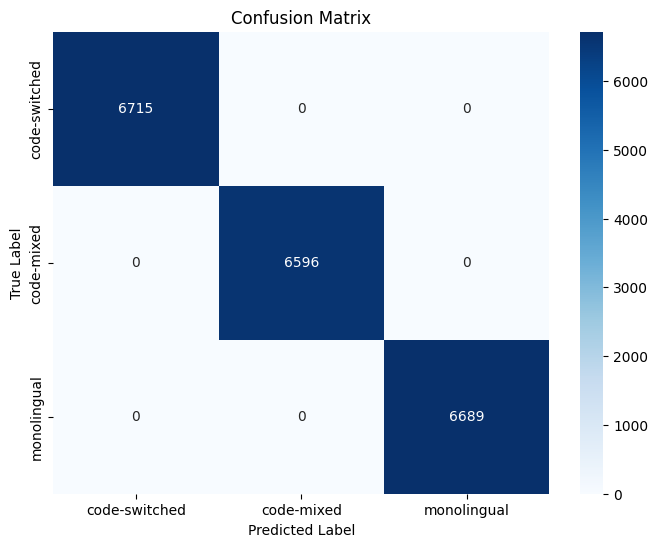

In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['code-switched', 'code-mixed', 'monolingual'], yticklabels=['code-switched', 'code-mixed', 'monolingual'])
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Example: Predicting on new sentences
new_sentences = [
    'Can you help me with this tarea?',         # Example of code-switching (English-Spanish)
    'This is an excelente opportunity',  # Example of code-mixing
    'The party was very fun'  # Example of monolingual (English)
]

In [ ]:
# Transform the new sentences using the fitted TF-IDF vectorizer
new_sentences_tfidf = tfidf_vectorizer.transform(new_sentences)

In [ ]:
# Predict whether these sentences are code-switched, code-mixed, or monolingual
predictions = log_reg.predict(new_sentences_tfidf)

print("\nPredictions for new sentences:")
for sentence, pred in zip(new_sentences, predictions):
    print(f"Sentence: '{sentence}' -> Prediction: {pred}")


Predictions for new sentences:
Sentence: 'Can you help me with this tarea?' -> Prediction: code-switched
Sentence: 'This is an excelente opportunity' -> Prediction: code-mixed
Sentence: 'The party was very fun' -> Prediction: monolingual
